### Telecom customer Churn data analysis for maching learning with python
#### Dataset Source: https://learn.datacamp.com/courses/marketing-analytics-predicting-customer-churn-in-python

#### import pandas as pd

In [356]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, recall_score, f1_score

import warnings
warnings.filterwarnings('ignore')

#### Load data

In [357]:
df=pd.read_csv("Churn.csv")
pd.options.display.max_columns = df.shape[1]

display(df.head(10))
#display(df.sample(10))
print(df.shape)


,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,no,no,yes,110,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,no,no,yes,123,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,no,no,no,114,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,no,yes,no,71,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,no,yes,no,113,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626
5,118,0,223.4,220.6,203.9,6.3,0,no,yes,no,98,37.98,101,18.75,118,9.18,6,1.70,AL,510,391-8027
6,121,24,218.2,348.5,212.6,7.5,3,no,no,yes,88,37.09,108,29.62,118,9.57,7,2.03,MA,510,355-9993
7,147,0,157.0,103.1,211.8,7.1,0,no,yes,no,79,26.69,94,8.76,96,9.53,6,1.92,MO,415,329-9001
8,117,0,184.5,351.6,215.8,8.7,1,no,no,no,97,31.37,80,29.89,90,9.71,4,2.35,LA,408,335-4719
9,141,37,258.6,222.0,326.4,11.2,0,no,yes,yes,84,43.96,111,18.87,97,14.69,5,3.02,WV,415,330-8173


(3333, 21)


In [358]:
#print(df.columns)

In [359]:
df = df.drop(["Area_Code", "Phone", "State"], axis=1)

print(df.shape)

(3333, 18)


In [360]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 18 columns):
Account_Length    3333 non-null int64
Vmail_Message     3333 non-null int64
Day_Mins          3333 non-null float64
Eve_Mins          3333 non-null float64
Night_Mins        3333 non-null float64
Intl_Mins         3333 non-null float64
CustServ_Calls    3333 non-null int64
Churn             3333 non-null object
Intl_Plan         3333 non-null object
Vmail_Plan        3333 non-null object
Day_Calls         3333 non-null int64
Day_Charge        3333 non-null float64
Eve_Calls         3333 non-null int64
Eve_Charge        3333 non-null float64
Night_Calls       3333 non-null int64
Night_Charge      3333 non-null float64
Intl_Calls        3333 non-null int64
Intl_Charge       3333 non-null float64
dtypes: float64(8), int64(7), object(3)
memory usage: 429.7+ KB


#### Data Preprocessing

In [361]:
df["Churn"].value_counts()

no     2850
yes     483
Name: Churn, dtype: int64

In [362]:
df["Intl_Plan"].value_counts()

no     3010
yes     323
Name: Intl_Plan, dtype: int64

In [363]:
df["Vmail_Plan"].value_counts()

no     2411
yes     922
Name: Vmail_Plan, dtype: int64

###### In label encoding, if there are many unique values, there is the possibility of having high values in the end. data can bias. on the other hand in one-hot encoding creates many columns(n-1), so it can increase dimensionality. here in this dataset as we drop "State" we can use label encoding.

In [364]:
df["Churn"] = df["Churn"].replace({"no":0, "yes": 1})
df["Intl_Plan"] = df["Intl_Plan"].replace({"no":0, "yes": 1})
df["Vmail_Plan"] = df["Vmail_Plan"].replace({"no":0, "yes": 1})

display(df.head(10))
df.info()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,110,45.07,99,16.78,91,11.01,3,2.70
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,123,27.47,103,16.62,103,11.45,3,3.70
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,71,50.90,88,5.26,89,8.86,7,1.78
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,113,28.34,122,12.61,121,8.41,3,2.73
5,118,0,223.4,220.6,203.9,6.3,0,0,1,0,98,37.98,101,18.75,118,9.18,6,1.70
6,121,24,218.2,348.5,212.6,7.5,3,0,0,1,88,37.09,108,29.62,118,9.57,7,2.03
7,147,0,157.0,103.1,211.8,7.1,0,0,1,0,79,26.69,94,8.76,96,9.53,6,1.92
8,117,0,184.5,351.6,215.8,8.7,1,0,0,0,97,31.37,80,29.89,90,9.71,4,2.35
9,141,37,258.6,222.0,326.4,11.2,0,0,1,1,84,43.96,111,18.87,97,14.69,5,3.02


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 18 columns):
Account_Length    3333 non-null int64
Vmail_Message     3333 non-null int64
Day_Mins          3333 non-null float64
Eve_Mins          3333 non-null float64
Night_Mins        3333 non-null float64
Intl_Mins         3333 non-null float64
CustServ_Calls    3333 non-null int64
Churn             3333 non-null int64
Intl_Plan         3333 non-null int64
Vmail_Plan        3333 non-null int64
Day_Calls         3333 non-null int64
Day_Charge        3333 non-null float64
Eve_Calls         3333 non-null int64
Eve_Charge        3333 non-null float64
Night_Calls       3333 non-null int64
Night_Charge      3333 non-null float64
Intl_Calls        3333 non-null int64
Intl_Charge       3333 non-null float64
dtypes: float64(8), int64(10)
memory usage: 468.7 KB


In [382]:
feature = df.drop('Churn', axis=1)
y = df['Churn']

print(feature.shape, y.shape)

(3333, 17) (3333,)


#### Data Transformation
Most of the case Data Transformation improve model performance


In [383]:
# normalize the feature columns
scaler = MinMaxScaler()

for col in feature.columns:
    feature[col] = scaler.fit_transform(feature[[col]])

display(feature.sample(10))

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge
2183,0.566116,0.000000,0.417617,0.782238,0.410974,0.700,0.333333,0.0,0.0,0.612121,0.417673,0.835294,0.782271,0.457746,0.411237,0.30,0.700000
2743,0.367769,0.000000,0.565849,0.733022,0.591985,0.400,0.222222,0.0,0.0,0.751515,0.565895,0.588235,0.733096,0.330986,0.592349,0.35,0.400000
2439,0.727273,0.000000,0.500855,0.463569,0.472566,0.730,0.111111,0.0,0.0,0.727273,0.500838,0.529412,0.463604,0.542254,0.472803,0.20,0.729630
2080,0.446281,0.000000,0.570410,0.827330,0.572351,0.595,0.000000,0.0,0.0,0.436364,0.570423,0.705882,0.827564,0.246479,0.572624,0.25,0.594444
1523,0.665289,0.000000,0.328107,0.541105,0.508876,0.570,0.222222,0.0,0.0,0.539394,0.328135,0.652941,0.541249,0.457746,0.509265,0.15,0.570370
303,0.648760,0.000000,0.450399,0.804234,0.586068,0.455,0.111111,0.0,0.0,0.642424,0.450369,0.670588,0.804270,0.394366,0.586372,0.20,0.455556
841,0.314050,0.000000,0.681870,0.412428,0.370091,0.515,0.555556,0.0,0.0,0.690909,0.681757,0.676471,0.412488,0.338028,0.370592,0.10,0.514815
1625,0.409091,0.745098,0.640536,0.808359,0.717590,0.490,0.000000,0.0,1.0,0.733333,0.640510,0.770588,0.808476,0.197183,0.717872,0.30,0.490741
2602,0.351240,0.000000,0.462942,0.459170,0.284293,0.570,0.222222,1.0,0.0,0.793939,0.462944,0.600000,0.459398,0.598592,0.284519,0.10,0.570370
929,0.095041,0.000000,0.689567,0.399230,0.514524,0.330,0.111111,0.0,0.0,0.630303,0.689470,0.658824,0.399224,0.507042,0.514644,0.25,0.329630


In [385]:
feature.describe()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.413491,0.158804,0.512472,0.552599,0.477870,0.511865,0.173651,0.096910,0.276628,0.608701,0.512446,0.588908,0.552687,0.472590,0.478143,0.223972,0.511960
std,0.164554,0.268399,0.155266,0.139439,0.136024,0.139592,0.146166,0.295879,0.447398,0.121631,0.155255,0.117192,0.139459,0.137807,0.136035,0.123061,0.139588
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.301653,0.000000,0.409635,0.458070,0.386767,0.425000,0.111111,0.000000,0.000000,0.527273,0.409624,0.511765,0.458104,0.380282,0.387328,0.150000,0.425926
50%,0.413223,0.000000,0.511403,0.553753,0.478752,0.515000,0.111111,0.000000,0.000000,0.612121,0.511402,0.588235,0.553866,0.471831,0.478781,0.200000,0.514815
75%,0.520661,0.392157,0.616876,0.646962,0.570468,0.605000,0.222222,0.000000,1.000000,0.690909,0.616868,0.670588,0.647040,0.563380,0.570831,0.300000,0.605556
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Feature and target variable separation

In [365]:
df['Churn'].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

In [366]:

X = df.drop('Churn', axis=1)
y = df[['Churn']]

print(X.shape, y.shape)

(3333, 17) (3333, 1)


#### Train test separation

In [369]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=1, 
                                                    stratify=y)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2499, 17) (834, 17) (2499, 1) (834, 1)


#### Training: Decision Tree Classifier

In [370]:
model = DecisionTreeClassifier()
model = model.fit(X_train, y_train)

#### prediction 

In [371]:
y_pred = model.predict(X_test)

In [372]:
y_test['predicted_Churn'] = y_pred

#### Prediction Comparison with the test data


In [373]:
y_test['probability'] = np.round(model.predict_proba(X_test)[:,1], 2)
y_test['predicted_Churn'] = y_pred

display(y_test.sample(10))

,Churn,predicted_Churn,probability
2328,0,0,0.0
1834,0,0,0.0
75,0,0,0.0
2589,0,0,0.0
2647,1,1,1.0
1944,0,0,0.0
632,0,0,0.0
1855,0,0,0.0
2398,0,0,0.0
994,0,0,0.0


#### Confusion Matrix

In [374]:
confusion_matrix_ = confusion_matrix(y_test['Churn'], 
                                     y_test['predicted_Churn'])

print('confusion_matrix: \n', confusion_matrix_)

### DEPRECATED and version problem

confusion_matrix: 
 [[671  42]
 [ 33  88]]


In [375]:
TN = confusion_matrix_[0,0]
print("True Negatives = ", TN)

FN = confusion_matrix_[1,0]
print("False Negatives = ", FN)

FP = confusion_matrix_[0,1]
print("False Positives = ", FP)

TP = confusion_matrix_[1,1]
print("True Positives = ", TP)

True Negatives =  671
False Negatives =  33
False Positives =  42
True Positives =  88


#### Accuracy

In [376]:
accuracy_ = accuracy_score(y_test['Churn'], 
                           y_test['predicted_Churn'])

print('Accuracy: ', accuracy_)

Accuracy:  0.910071942446


#### Precision, Recall, F1 score


In [377]:
precision_ = np.round(precision_score(y_test['Churn'], 
                                      y_test['predicted_Churn']), 2)
recall_ = np.round(recall_score(y_test['Churn'], 
                                y_test['predicted_Churn']), 2)
f1_score__ = np.round(f1_score(y_test['Churn'], 
                               y_test['predicted_Churn']), 2)

print("Precision = ", precision_)
print("Recall = ", recall_)
print("f1 score = ", f1_score__)

Precision =  0.68
Recall =  0.73
f1 score =  0.7


#### precision: 
Precision can be seen as a measure of a classifier’s exactness. For each class, it is defined as the ratio of true positives to the sum of true and false positives. Said another way, “for all instances classified positive, what percent was correct?”

#### recall: 
Recall is a measure of the classifier’s completeness; the ability of a classifier to correctly find all positive instances. For each class, it is defined as the ratio of true positives to the sum of true positives and false negatives. Said another way, “for all instances that were actually positive, what percent was classified correctly?”

#### f1 score: 
The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. Generally speaking, F1 scores are lower than accuracy measures as they embed precision and recall into their computation. As a rule of thumb, the weighted average of F1 should be used to compare classifier models, not global accuracy

#### Classification report


In [378]:
class_report = classification_report(y_test['Churn'], 
                                     y_test['predicted_Churn'])
print("Classification Report: \n", class_report)

Classification Report: 
              precision    recall  f1-score   support

          0       0.95      0.94      0.95       713
          1       0.68      0.73      0.70       121

avg / total       0.91      0.91      0.91       834



#### ROC-AUC

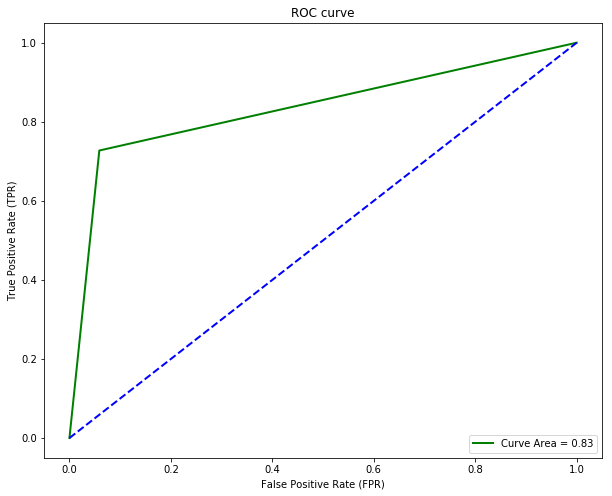

In [379]:
fpr, tpr, thr = roc_curve(y_test['Churn'], 
                          y_test['probability'])
auc = np.round(roc_auc_score(y_test['Churn'], 
                             y_test['predicted_Churn']), 2)

plt.figure(figsize=(10, 8))
plt.plot(fpr, 
         tpr, 
         color='green', 
         lw=2, 
         label="Curve Area = " +str(auc))

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()